In [129]:
# Task 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [17]:
df_diamond=pd.read_csv("diamond.csv")
print(df_diamond)


      Unnamed: 0 carat        cut color clarity  average us salary  \
0              1  0.23      Ideal     E     SI2              31282   
1              2  0.21    Premium     E     SI1              40049   
2              3  0.23       Good     E     VS1              33517   
3              4  0.29    Premium     I     VS2              38495   
4              5  0.31       Good     J     SI2              34178   
...          ...   ...        ...   ...     ...                ...   
53935      53936  0.72      Ideal     D     SI1              43892   
53936      53937  0.72       Good     D     SI1              35532   
53937      53938   0.7  Very Good     D     SI1              32133   
53938      53939  0.86    Premium     H     SI2              44248   
53939      53940  0.75      Ideal     D     SI2              41412   

       number of diamonds mined (millions) depth table price     x     y     z  
0                                     5.01  61.5    55   326  3.95  3.98  2.43

In [19]:
# Task 2: Dataset Statistics
df_diamond.describe()

,average us salary,number of diamonds mined (millions)
count,53940.000000,53940.000000
mean,39521.990100,2.902669
std,5486.892971,1.325985
min,30000.000000,0.600000
25%,34780.000000,1.750000
50%,39547.500000,2.910000
75%,44252.000000,4.050000
max,48999.000000,5.200000


In [23]:
#Elimination of Invalid entries
invalid_entries = ['TRUE', 'FALSE', 'MAYBE']
df_diamond = df_diamond.replace(invalid_entries, pd.NA)

In [25]:
# Task 3: Handling missing entries.
for col in df_diamond.select_dtypes(include=['float64', 'int64']).columns:
    df_diamond[col] = df_diamond[col].fillna(df_diamond[col].mean())

for col in df_diamond.select_dtypes(include=['object']).columns:
     df_diamond[col] = df_diamond[col].fillna(df_diamond[col].mode()[0])

df_diamond = df_diamond.copy()
df_diamond

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


In [27]:
# Task 4: Handle mismatched string formats..
for val in df_diamond.columns:
    if df_diamond[val].dtype == "object":
        df_diamond[val] = df_diamond[val].str.lower()
df_diamond

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,ideal,e,si2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,premium,e,si1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,good,e,vs1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,premium,i,vs2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,good,j,si2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,ideal,d,si1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,good,d,si1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,very good,d,si1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,premium,h,si2,44248,4.03,61,58,2757,6.15,6.12,3.74


In [29]:
# Task 5: Handling outliers.
for _ in df_diamond.columns:
    if df_diamond[_].dtype in ['float' , 'int']:
        q1 = df_diamond[_].quantile(0.25)
        q3 = df_diamond[_].quantile(0.75)
        range__ = q3 - q1
        lower = q1 - 1.5 * range__
        upper = q3 + 1.5 * range__
        mean = df_diamond[_].mean()
        df_diamond.loc[(df_diamond[_] < lower) | (df_diamond[_] > upper), col] = mean
df_diamond

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,ideal,e,si2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,premium,e,si1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,good,e,vs1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,premium,i,vs2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,good,j,si2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,ideal,d,si1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,good,d,si1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,very good,d,si1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,premium,h,si2,44248,4.03,61,58,2757,6.15,6.12,3.74


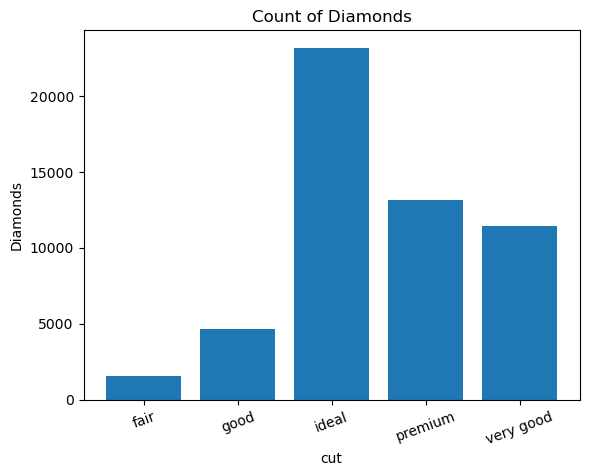

In [31]:
# Task 6: Data Visualization 
cut = df_diamond.groupby("cut").size()
plt.bar(cut.index,cut.values)
plt.title("Count of Diamonds")
plt.xlabel("cut")
plt.ylabel("Diamonds")
plt.xticks(rotation=20)
plt.show()

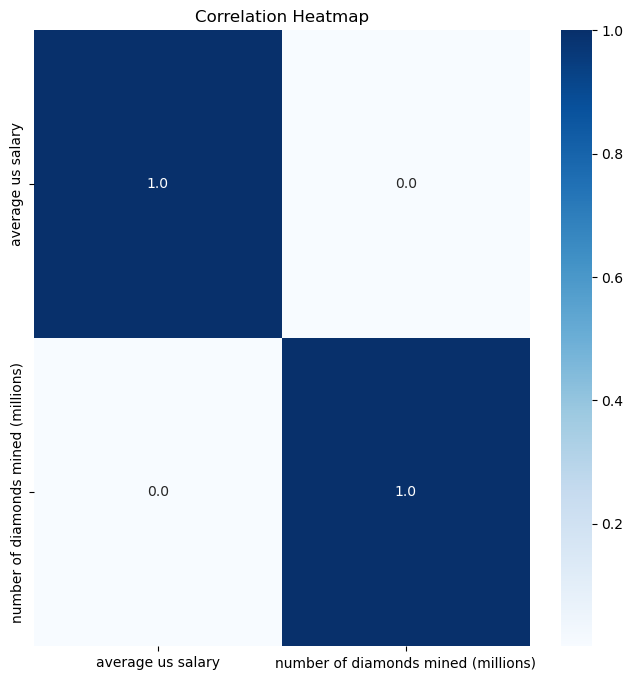

In [35]:
# Task 6: Data Visualization 
numeric_df_diamond = df_diamond.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_df_diamond.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

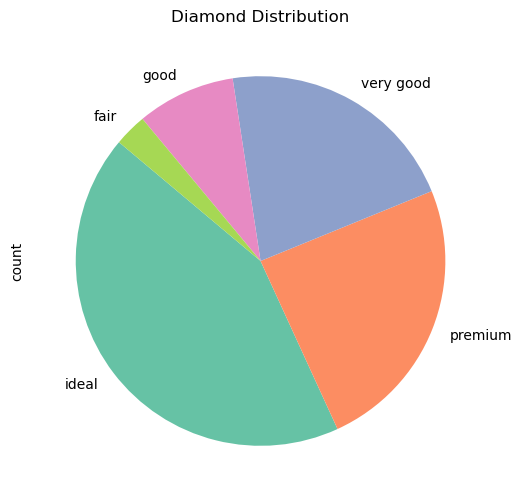

In [37]:
# Task 6: Data Visualization 
diamond_counts = df_diamond['cut'].value_counts()
diamond_counts.plot.pie(startangle=140, colors=sns.color_palette('Set2'), figsize=(6,6))
plt.title('Diamond Distribution')
plt.show()

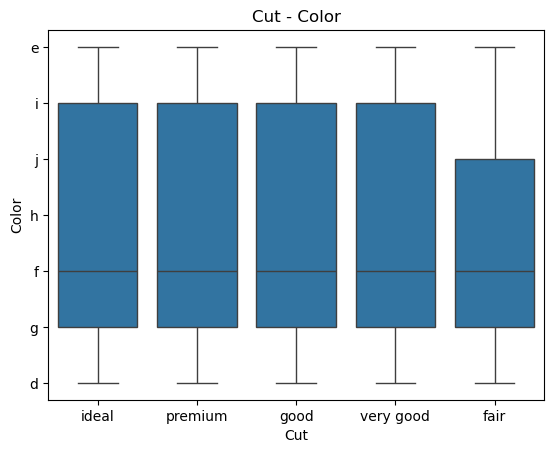

In [39]:
# Task 6: Data Visualization 
sns.boxplot(x='cut', y='color', data=df_diamond)
plt.title('Cut - Color')
plt.xlabel('Cut')
plt.ylabel('Color')
plt.show()


In [41]:
df_diamond1 = df_diamond.copy()

Correlation value of each feature with price:
 price                                  1.000000
clarity                                0.022733
depth                                  0.021199
cut                                    0.013071
color                                  0.010963
number of diamonds mined (millions)    0.000728
average us salary                     -0.002904
table                                 -0.037912
carat                                 -0.166821
y                                     -0.171409
z                                     -0.173501
x                                     -0.178188
Unnamed: 0                            -0.276088
Name: price, dtype: float64

Columns with low correlation: ['number of diamonds mined (millions)', 'average us salary']


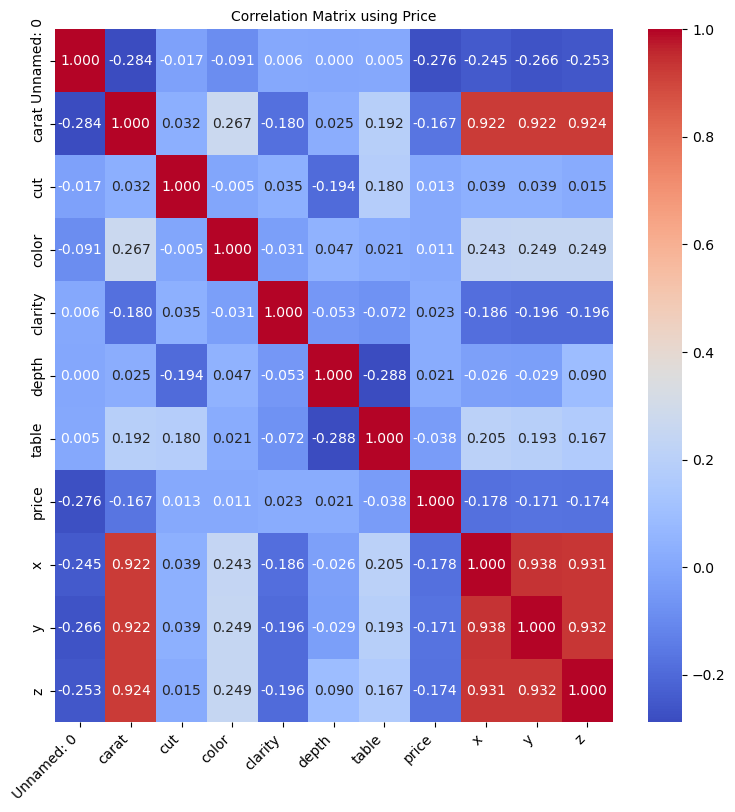

In [43]:
# Task 7: Correlation Identification
for col in df_diamond.select_dtypes(include=['object']).columns:
    df_diamond[col] = pd.Categorical(df_diamond[col]).codes
matrix = df_diamond.corr()
correlation = matrix['price'].sort_values(ascending=False)
print("Correlation value of each feature with price:\n", correlation)
threshold = 0.01
low = correlation[correlation.abs() < threshold].index
df_diamond = df_diamond.drop(columns=low)
print(f"\nColumns with low correlation: {list(low)}")
plt.figure(figsize=(9, 9))
sns.heatmap(df_diamond.corr(), cmap='coolwarm', annot=True, fmt=".3f")
plt.title("Correlation Matrix using Price", size=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
#onehot encoding
df_diamond1 = df_diamond1.drop(columns=['number of diamonds mined (millions)', 'average us salary'])
for col in ['cut', 'clarity','color']:
    df_diamond1[col], _ = pd.factorize(df_diamond1[col])

print(df_diamond1.head())

  Unnamed: 0 carat  cut  color  clarity depth table price     x     y     z
0          1  0.23    0      0        0  61.5    55   326  3.95  3.98  2.43
1          2  0.21    1      0        1  59.8    61   326  3.89  3.84  2.31
2          3  0.23    2      0        2  56.9    65   327  4.05  4.07  2.31
3          4  0.29    1      1        3  62.4    58   334   4.2  4.23  2.63
4          5  0.31    2      2        0  63.3    58   335  4.34  4.35  2.75


In [47]:
df_diamond1['cut']= pd.Categorical(df_diamond1['cut']).codes
df_diamond1

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,0,0,61.5,55,326,3.95,3.98,2.43
1,2,0.21,1,0,1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,2,0,2,56.9,65,327,4.05,4.07,2.31
3,4,0.29,1,1,3,62.4,58,334,4.2,4.23,2.63
4,5,0.31,2,2,0,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,0,6,1,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,2,6,1,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,3,6,1,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,1,3,0,61,58,2757,6.15,6.12,3.74


In [49]:
object_columns = df_diamond1.select_dtypes(include=['object']).columns
df_diamond1[object_columns] = df_diamond1[object_columns].apply(pd.to_numeric, errors='coerce')

df_diamond1['cut'] = df_diamond1['cut'].apply(pd.to_numeric, errors='coerce')

In [74]:
X = df_diamond1.drop(columns=['price'])
y = df_diamond1['price']
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [76]:
normalize = df_diamond1.select_dtypes(include=['float', 'int']).columns
min_values = df_diamond1[normalize].min()
max_values = df_diamond1[normalize].max()
print('Minimum of each column is:\n', min_values)
print('Maximum of each column is:\n', max_values)
for column in normalize:
    df_diamond1[column] = (df_diamond1[column] - min_values[column]) / (max_values[column] - min_values[column])
df_diamond1

Minimum of each column is:
 Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64
Maximum of each column is:
 Unnamed: 0    1.0
carat         1.0
cut           1.0
color         1.0
clarity       1.0
depth         1.0
table         1.0
price         1.0
x             1.0
y             1.0
z             1.0
dtype: float64


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.000000,0.006237,0.00,0.000000,0.000000,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.000019,0.002079,0.25,0.000000,0.142857,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.000037,0.006237,0.50,0.000000,0.285714,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.000056,0.018711,0.25,0.166667,0.428571,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.000074,0.022869,0.50,0.333333,0.000000,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.999926,0.108108,0.00,1.000000,0.142857,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.999944,0.108108,0.50,1.000000,0.142857,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.999963,0.103950,0.75,1.000000,0.142857,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.999981,0.137214,0.25,0.500000,0.000000,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


In [78]:
print("X_train : ",X_train.shape)
print("X_train : ",X_test.shape)
print("y_test : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (43152, 10)
X_train :  (10788, 10)
y_test :  (43152,)
y_test :  (10788,)


In [80]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  

In [82]:
import numpy as np
import matplotlib.pyplot as plt
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std
X_train_scaled, mean_train, std_train = standardize(X_train)
X_test_scaled = (X_test - mean_train) / std_train
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [84]:
def elastic_net(X, y, lambda_1, lambda_2, iterations=5000, learning_rate=0.01): 
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  
    for iteration in range(iterations):
        for j in range(n_features):
            prediction = X.dot(w)
            residual = y - prediction
            grad = -(X[:, j].dot(residual)) / n_samples + lambda_1 * w[j]
            w[j] -= learning_rate * grad 
            if w[j] > lambda_2:
                w[j] -= lambda_2
            elif w[j] < -lambda_2:
                w[j] += lambda_2
            else:
                w[j] = 0  
    return w
lambda_1 = 1e-6  
lambda_2 = 1e-6
weights_elastic_net = elastic_net(X_train_b, y_train, lambda_1, lambda_2)
y_train_pred = X_train_b.dot(weights_elastic_net)
y_test_pred = X_test_b.dot(weights_elastic_net)
mse_train_elastic = np.mean((y_train - y_train_pred) ** 2)
mse_test_elastic = np.mean((y_test - y_test_pred) ** 2)
print(f'Elastic Net on training set: {mse_train_elastic}')
print(f'Elastic Net on test set: {mse_test_elastic}')

Elastic Net on training set: 0.010284777429731233
Elastic Net on test set: 0.012185780261995965


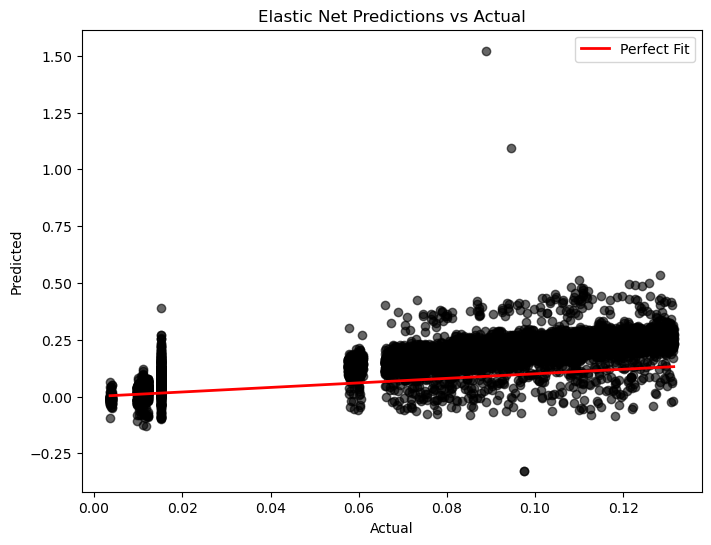

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Elastic Net Predictions vs Actual')
plt.legend()
plt.show()

In [88]:
def xavier_initialization(input_dim):
    limit = np.sqrt(6 / input_dim)
    weights = np.random.uniform(-limit, limit, size=input_dim)
    return weights

In [90]:
def elastic_net(X, y, lambda_1, lambda_2, iterations=5000, learning_rate=0.01, init_method='xavier'):
    n_samples, n_features = X.shape
    if init_method == 'zero':
        w = np.zeros(n_features) 
    elif init_method == 'random':
        w = np.random.rand(n_features)  
    elif init_method == 'xavier':
        w = xavier_initialization(n_features)
    else:
        raise ValueError("Invalid initialization method")
    for iteration in range(iterations):
        for j in range(n_features):
            prediction = X.dot(w)
            residual = y - prediction
            grad = -(X[:, j].dot(residual)) / n_samples + lambda_1 * w[j]
            w[j] -= learning_rate * grad
            if w[j] > lambda_2:
                w[j] -= lambda_2
            elif w[j] < -lambda_2:
                w[j] += lambda_2
            else:
                w[j] = 0  
    return w

Elastic Net with random initialization on training set: 0.01029598672162056
Elastic Net with random initialization on test set: 0.012232665143119515


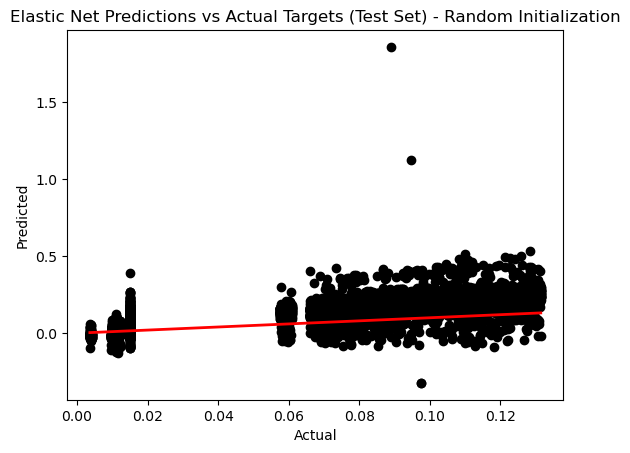

Elastic Net with zero initialization on training set: 0.010284777429731233
Elastic Net with zero initialization on test set: 0.012185780261995965


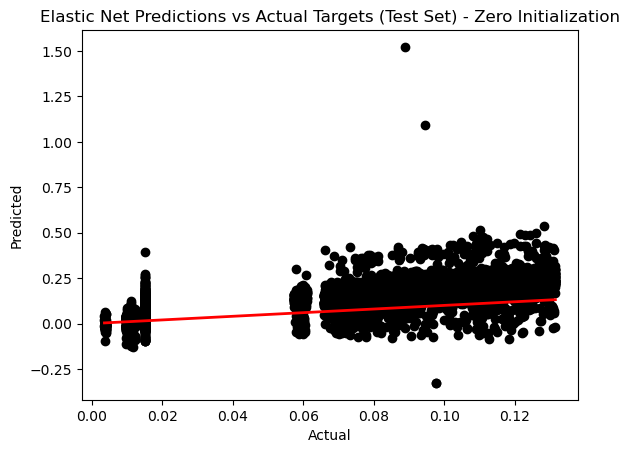

Elastic Net with xavier initialization on training set: 0.010290288701127555
Elastic Net with xavier initialization on test set: 0.012501319674725618


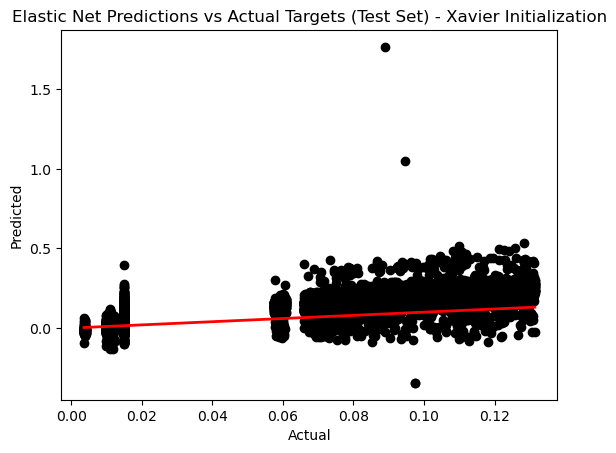

In [92]:
init_methods = ['random', 'zero', 'xavier']
for method in init_methods:
    weights_elastic_net = elastic_net(X_train_b, y_train, lambda_1, lambda_2, init_method=method)
    y_train_pred = X_train_b.dot(weights_elastic_net)
    y_test_pred = X_test_b.dot(weights_elastic_net)
    mse_train_elastic = np.mean((y_train - y_train_pred) ** 2)
    mse_test_elastic = np.mean((y_test - y_test_pred) ** 2)
    print(f'Elastic Net with {method} initialization on training set: {mse_train_elastic}')
    print(f'Elastic Net with {method} initialization on test set: {mse_test_elastic}')
    plt.scatter(y_test, y_test_pred, color='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Elastic Net Predictions vs Actual Targets (Test Set) - {method.capitalize()} Initialization')
    plt.show()


In [117]:
def elastic_net_with_loss(X, y, lambda_1, lambda_2, iterations=5000, learning_rate=0.01, init_method='xavier'):
    n_samples, n_features = X.shape
    loss_history = []
    
    if init_method == 'zero':
        w = np.zeros(n_features)
    elif init_method == 'random':
        w = np.random.rand(n_features)
    elif init_method == 'xavier':
        w = xavier_initialization(n_features)
    else:
        raise ValueError("Invalid initialization method")
    
    for iteration in range(iterations):
        prediction = X.dot(w)
        residual = y - prediction
        loss = np.mean(residual ** 2) + lambda_1 * np.sum(w ** 2) + lambda_2 * np.sum(np.abs(w))
        loss_history.append(loss)  # Append loss at each iteration
        
        for j in range(n_features):
            grad = -(X[:, j].dot(residual)) / n_samples + lambda_1 * w[j]
            w[j] -= learning_rate * grad
            if w[j] > lambda_2:
                w[j] -= lambda_2
            elif w[j] < -lambda_2:
                w[j] += lambda_2
            else:
                w[j] = 0
    
    return w, loss_history

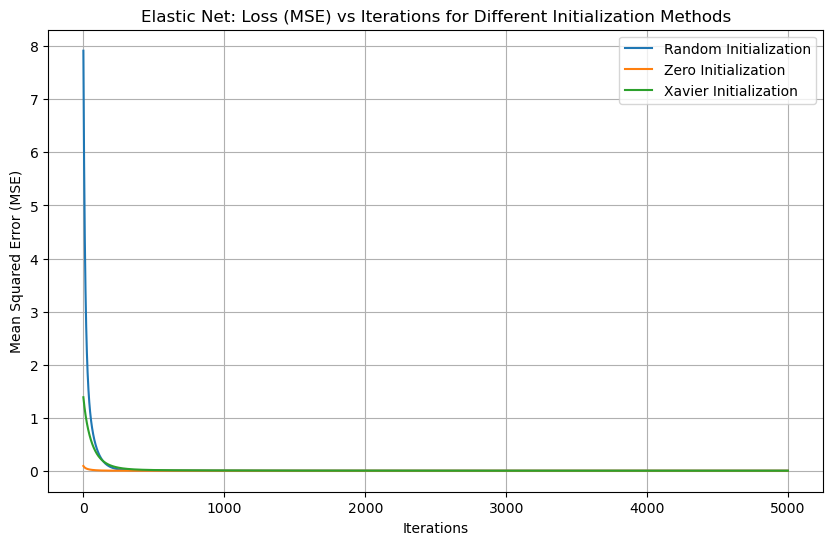

In [127]:
losses = {}
init_methods = ['random', 'zero', 'xavier']
for method in init_methods:
    _, loss_history = elastic_net_with_loss(X_train_b, y_train, lambda_1, lambda_2, init_method=method)
    losses[method] = loss_history

plt.figure(figsize=(10, 6))
for method in init_methods:
    plt.plot(losses[method], label=f'{method.capitalize()} Initialization')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elastic Net: Loss (MSE) vs Iterations for Different Initialization Methods')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
def elastic_net_with_early_stopping(X, y, lambda_1, lambda_2, max_iterations=5000, learning_rate=0.01, init_method='zero', threshold=0.01):
    n_samples, n_features = X.shape
    loss_values = []
    if init_method == 'zero':
        w = np.zeros(n_features)
    elif init_method == 'random':
        w = np.random.rand(n_features)
    elif init_method == 'xavier':
        w = xavier_initialization(n_features)
    else:
        raise ValueError("Invalid initialization method")

    for iteration in range(max_iterations):
        prediction = X.dot(w)
        residual = y - prediction
        loss = np.mean(residual ** 2) + lambda_1 * np.sum(w ** 2) + lambda_2 * np.sum(np.abs(w))
        loss_values.append(loss)
        grad = np.zeros(n_features)
        for j in range(n_features):
            grad[j] = -(X[:, j].dot(residual)) / n_samples + lambda_1 * w[j]
        if np.all(np.abs(grad) < threshold):
            print(f"Stopping early at iteration {iteration} with gradient {grad}")
            break
        for j in range(n_features):
            w[j] -= learning_rate * grad[j]
            if w[j] > lambda_2:
                w[j] -= lambda_2
            elif w[j] < -lambda_2:
                w[j] += lambda_2
            else:
                w[j] = 0

    return w, loss_values

In [97]:
def save_weights_to_pickle(weights, filename):
    with open(filename, 'wb') as file:
        pickle.dump(weights, file)
    print(f"Weights saved to {filename}")

Stopping early at iteration 3921 with gradient [-1.00000000e-04 -1.11430766e-04 -8.50926609e-05  1.05246220e-04
 -9.26584459e-05 -1.02294206e-04  1.96169347e-04  8.94734883e-05
  9.28782469e-04 -2.50857711e-04 -9.99850663e-04]
Elastic Net with random initialization on training set: 0.01031481810968954
Elastic Net with random initialization on test set: 0.011998256467505089
Elastic Net with random initialization on training set: 0.01031481810968954
Elastic Net with random initialization on test set: 0.011998256467505089
Stopping early at iteration 1947 with gradient [-1.00000681e-04 -1.26644077e-05 -9.99659754e-04  9.81164812e-05
 -1.08681474e-04 -9.29625980e-05  1.19649361e-04  1.16500888e-04
  2.73225569e-04  1.16792926e-04  2.34922931e-04]
Elastic Net with zero initialization on training set: 0.010298524448437044
Elastic Net with zero initialization on test set: 0.012938553319035656
Elastic Net with zero initialization on training set: 0.010298524448437044
Elastic Net with zero initi

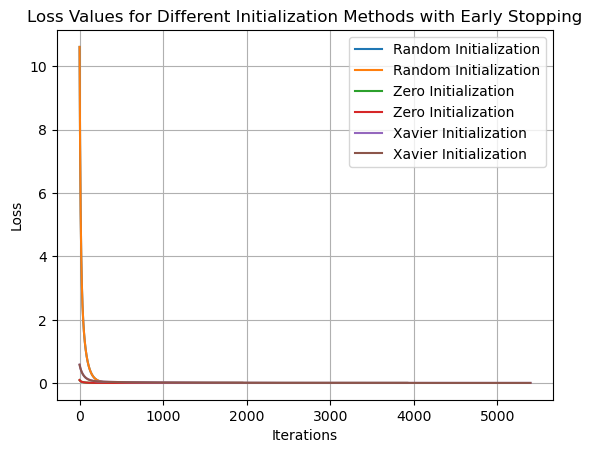

In [125]:
init_methods = ['random', 'zero', 'xavier']
for method in init_methods:
    weights_elastic_net, loss_values = elastic_net_with_early_stopping(X_train_b, y_train, lambda_1, lambda_2, max_iterations=100000, learning_rate=0.01, init_method=method, threshold=0.001)
    y_train_pred = X_train_b.dot(weights_elastic_net)
    y_test_pred = X_test_b.dot(weights_elastic_net)
    mse_train_elastic = np.mean((y_train - y_train_pred) ** 2)
    mse_test_elastic = np.mean((y_test - y_test_pred) ** 2)
    print(f'Elastic Net with {method} initialization on training set: {mse_train_elastic}')
    print(f'Elastic Net with {method} initialization on test set: {mse_test_elastic}')
    plt.plot(loss_values, label=f'{method.capitalize()} Initialization')
    print(f'Elastic Net with {method} initialization on training set: {mse_train_elastic}')
    print(f'Elastic Net with {method} initialization on test set: {mse_test_elastic}')
    
    if method == 'zero':
        
        filename = f'elastic_net_weights_{method}.pkl'
        save_weights_to_pickle(weights_elastic_net, filename)
    
    plt.plot(loss_values, label=f'{method.capitalize()} Initialization')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Values for Different Initialization Methods with Early Stopping')
plt.legend()
plt.grid()
plt.show()